# EXPLORATORY DATA ANALYSIS

importing libraries for data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the csv file and assigning the name d1 for the file

In [2]:
train=pd.read_csv('housing price.train.csv')
test=pd.read_csv('housing price.test.csv')

Adding an extra column to know whether it is train or test data

In [3]:
train["source"]="train"
test["source"]="test"
d1=pd.concat([train,test],ignore_index=True)
d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,train


In [4]:
d1.shape

(1460, 82)

there are 1460 rows and 82 columns in this dataset.

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#dropping pool quality and misc feature columns as 90% data are null values
d1.drop('PoolQC',axis=1,inplace=True)
d1.drop('MiscFeature',axis=1,inplace=True)

In [7]:
#dropping id column as it provides no information for our analysis
d1.drop('Id',axis=1,inplace=True)

In [8]:
d1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2007,WD,Normal,128000.0,train
1,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,224,0,NaN,0,10,2007,WD,Normal,268000.0,train
2,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,0,6,2007,WD,Normal,269790.0,train
3,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,0,1,2010,COD,Normal,190000.0,train
4,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,6,2009,WD,Normal,215000.0,train


In [9]:
#checking number of unique values in each row
d1.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
source              2
Length: 79, dtype: int64

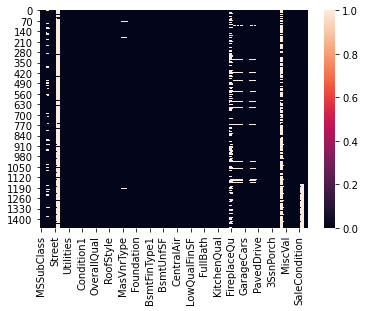

In [10]:
sns.heatmap(d1.isnull())

In [11]:
#checking number of null values in each row
d1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
source             0
Length: 79, dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
d1['Alley']=imp.fit_transform(d1['Alley'].values.reshape(-1,1))
d1['MasVnrType']=imp.fit_transform(d1['MasVnrType'].values.reshape(-1,1))
d1['BsmtQual']=imp.fit_transform(d1['BsmtQual'].values.reshape(-1,1))
d1['BsmtCond']=imp.fit_transform(d1['BsmtCond'].values.reshape(-1,1))
d1['BsmtExposure']=imp.fit_transform(d1['BsmtExposure'].values.reshape(-1,1))
d1['BsmtFinType1']=imp.fit_transform(d1['BsmtFinType1'].values.reshape(-1,1))
d1['BsmtFinType2']=imp.fit_transform(d1['BsmtFinType2'].values.reshape(-1,1))
d1['Electrical']=imp.fit_transform(d1['Electrical'].values.reshape(-1,1))
d1['FireplaceQu']=imp.fit_transform(d1['FireplaceQu'].values.reshape(-1,1))
d1['GarageType']=imp.fit_transform(d1['GarageType'].values.reshape(-1,1))
d1['GarageFinish']=imp.fit_transform(d1['GarageFinish'].values.reshape(-1,1))
d1['GarageQual']=imp.fit_transform(d1['GarageQual'].values.reshape(-1,1))
d1['GarageCond']=imp.fit_transform(d1['GarageCond'].values.reshape(-1,1))
d1['Fence']=imp.fit_transform(d1['Fence'].values.reshape(-1,1))

In [13]:
imp=SimpleImputer(strategy="mean")
d1['LotFrontage']=imp.fit_transform(d1['LotFrontage'].values.reshape(-1,1))
d1['MasVnrArea']=imp.fit_transform(d1['MasVnrArea'].values.reshape(-1,1))
d1['GarageYrBlt']=imp.fit_transform(d1['GarageYrBlt'].values.reshape(-1,1))
d1['SalePrice']=imp.fit_transform(d1['SalePrice'].values.reshape(-1,1))

In [14]:
d1.isnull().values.any()

False

all the null values are removed using mean and mode of respective columns

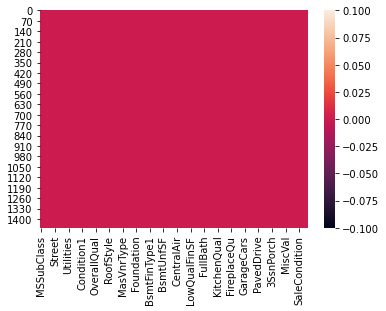

In [15]:
#presence of null values can be checked in visual method using heatmap
sns.heatmap(d1.isnull())

since the lines are continous and non interrupted,there are no null values present

In [16]:
#converting all object datatype into integer using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["MSZoning","Alley","Street","LotShape","LandContour","BsmtFinType2","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","Fence","SaleType","SaleCondition","source"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
d1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,120,3,70.049958,4928,1,0,0,3,0,4,...,0,0,2,0,2,2007,8,4,128000.0,1
1,20,3,95.000000,15865,1,0,0,3,0,4,...,224,0,2,0,10,2007,8,4,268000.0,1
2,60,3,92.000000,9920,1,0,0,3,0,1,...,0,0,2,0,6,2007,8,4,269790.0,1
3,20,3,105.000000,11751,1,0,0,3,0,4,...,0,0,2,0,1,2010,0,4,190000.0,1
4,20,3,70.049958,16635,1,0,0,3,0,2,...,0,0,2,0,6,2009,8,4,215000.0,1


In [19]:
d1.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
1455,20,3,78.000000,10206,1,0,3,3,0,4,...,0,0,2,0,10,2008,8,4,181477.005993,0
1456,20,3,57.000000,9245,1,0,1,3,0,4,...,0,0,2,0,2,2008,8,4,181477.005993,0
1457,20,3,70.049958,11241,1,0,0,3,0,1,...,0,0,2,700,3,2010,8,4,181477.005993,0
1458,50,4,50.000000,5000,1,0,3,3,0,0,...,0,0,2,0,10,2006,8,4,181477.005993,0
1459,160,4,21.000000,1953,1,0,3,3,0,4,...,0,0,2,0,6,2006,8,4,181477.005993,0


In [20]:
d1.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,0.028082,1.942466,2.777397,0.000685,3.019178,...,15.060959,2.758904,1.889726,43.489041,6.321918,2007.815753,7.513014,3.770548,181477.005993,0.800000
std,42.300571,0.632017,22.024023,9981.264932,0.063996,0.165264,1.409156,0.707666,0.026171,1.622634,...,55.757415,40.177307,0.440610,496.123024,2.703626,1.328095,1.552100,1.100854,70748.125717,0.400137
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,137800.000000,1.000000
50%,50.000000,3.000000,70.049958,9478.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,181477.005993,1.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,196250.000000,1.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,480.000000,738.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000,1.000000


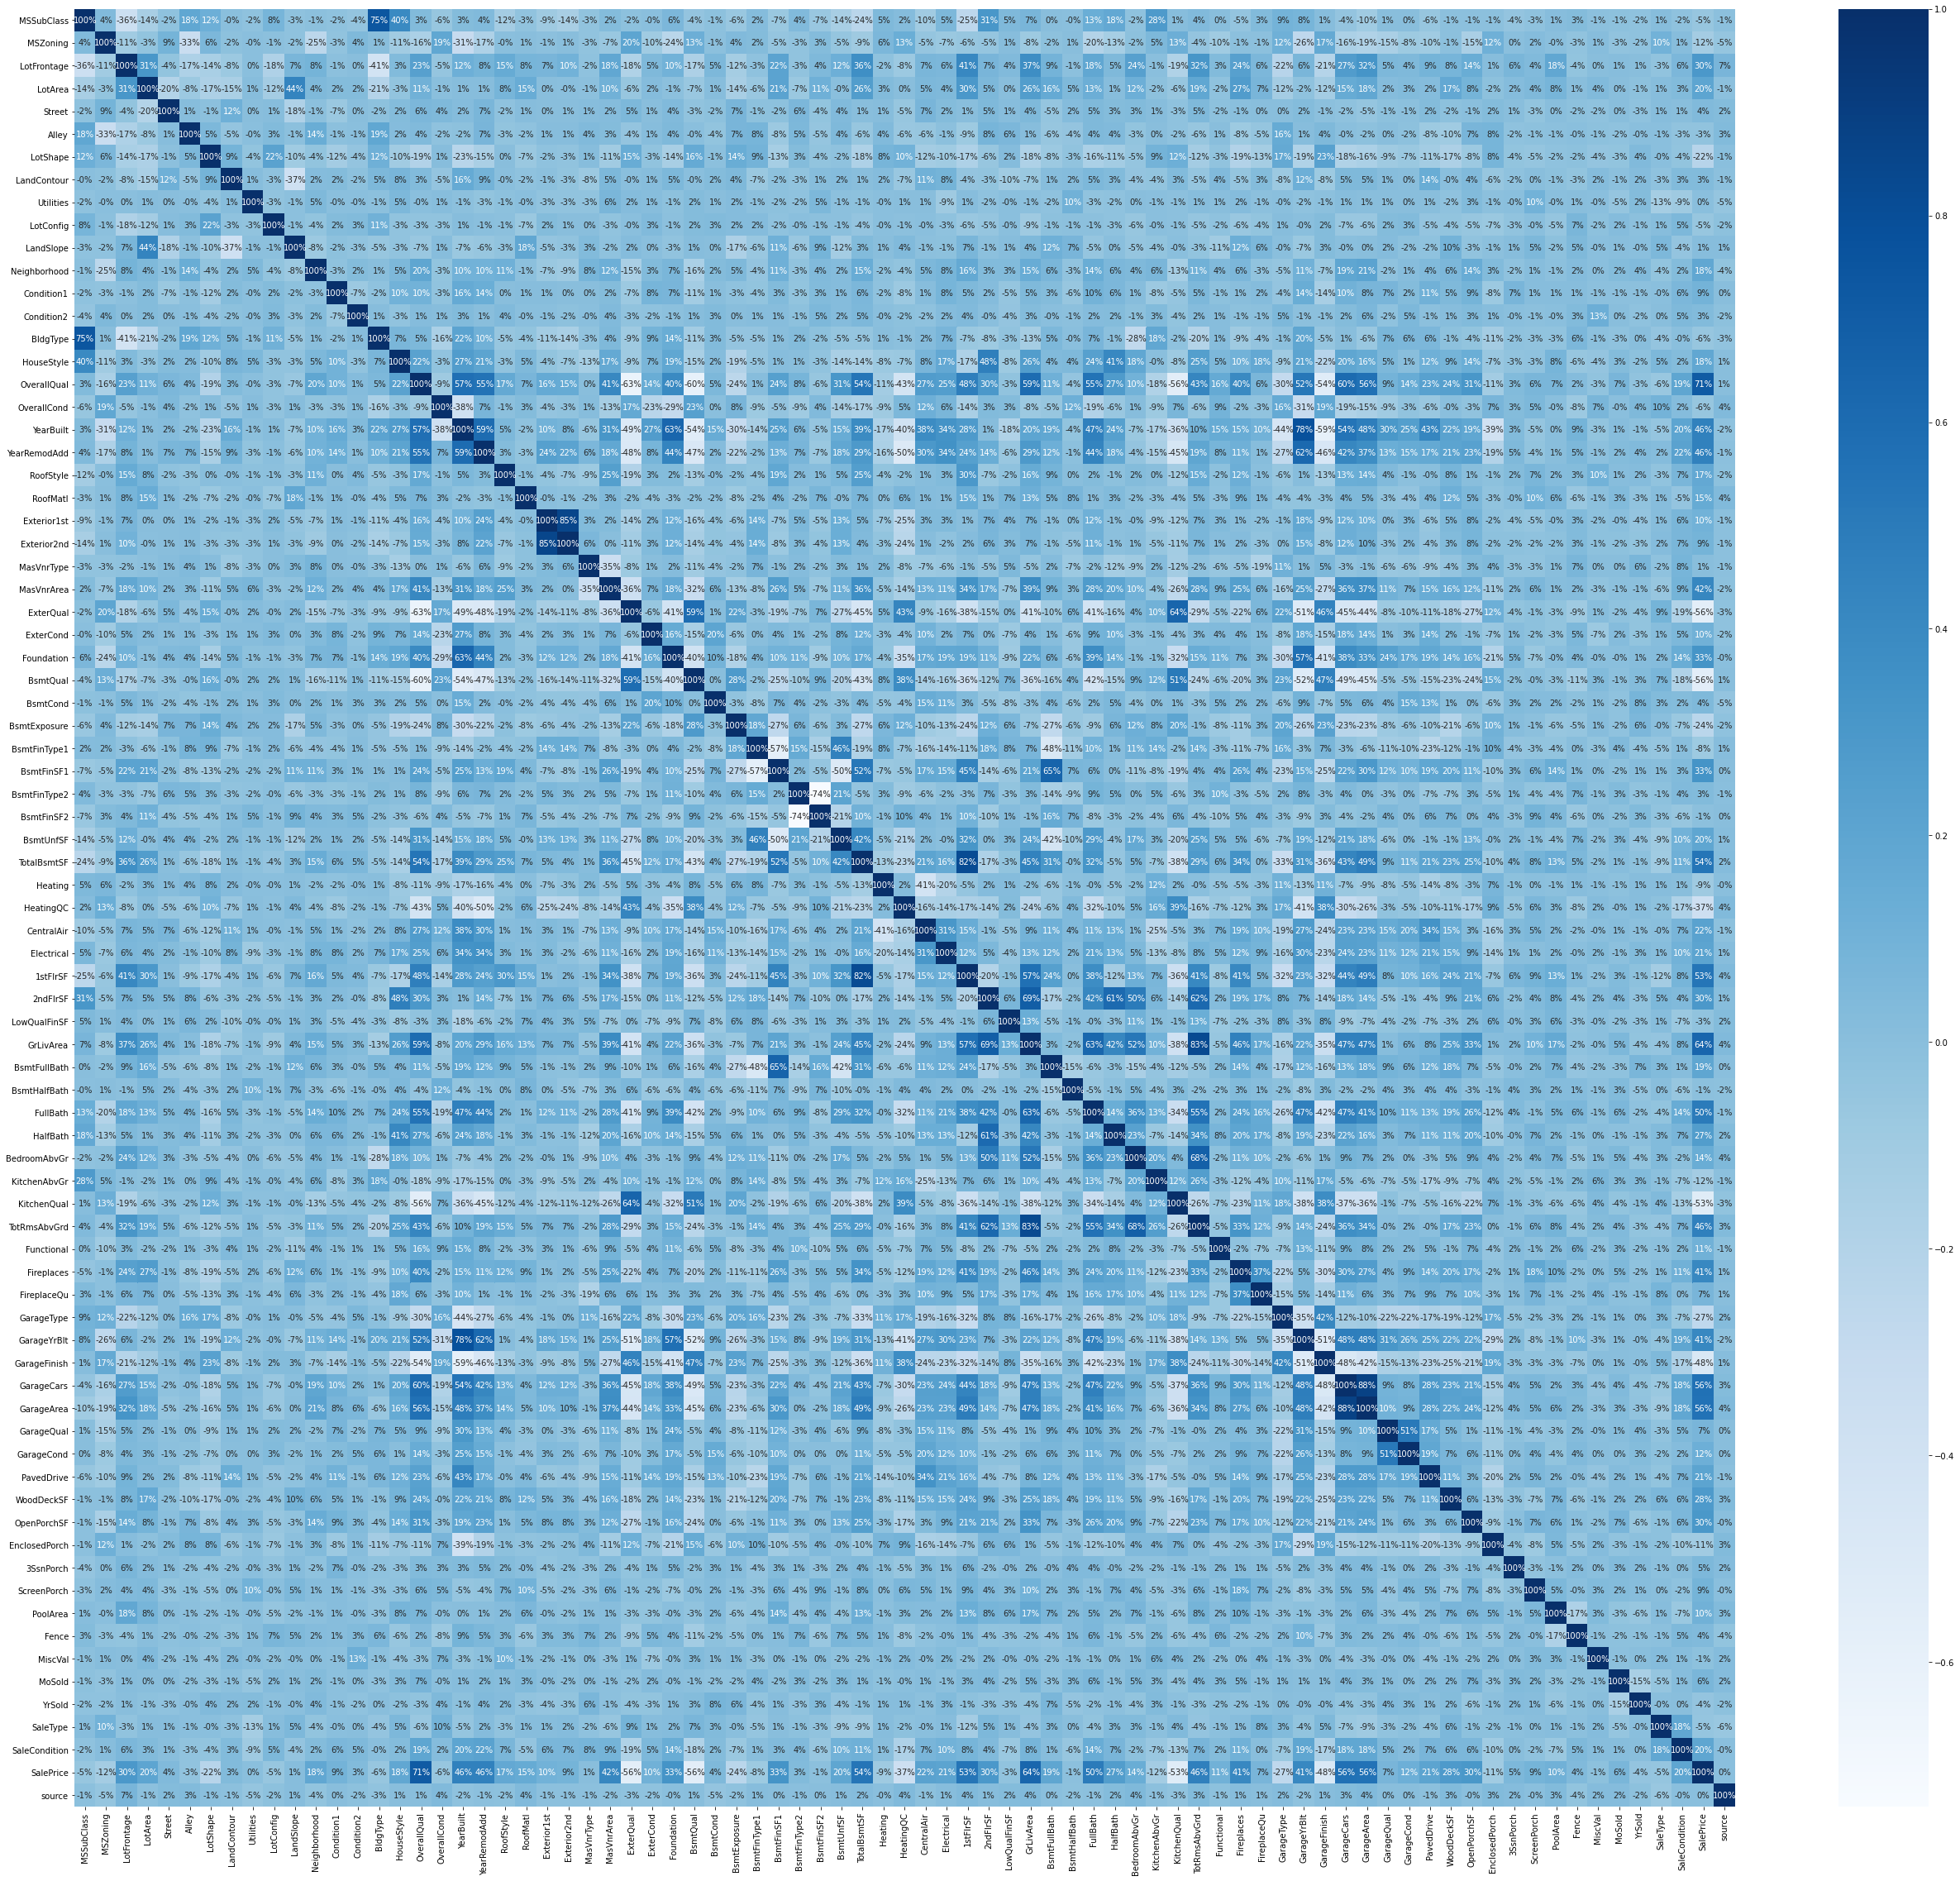

In [112]:
d1cor=d1.corr()
plt.figure(figsize=(45,40))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

This correlation heatmap can be expressed in matrix form also.It is displayed in descending order.columns with least correlation with target column are displayed at last.

In [22]:
corr_matrix=d1.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice       1.000000
OverallQual     0.709461
GrLivArea       0.635659
GarageCars      0.560622
GarageArea      0.555317
                  ...   
HeatingQC      -0.365654
GarageFinish   -0.479139
KitchenQual    -0.531681
BsmtQual       -0.556292
ExterQual      -0.563181
Name: SalePrice, Length: 79, dtype: float64


In [23]:
collist=d1.columns.values
ncol=35
nrows=7

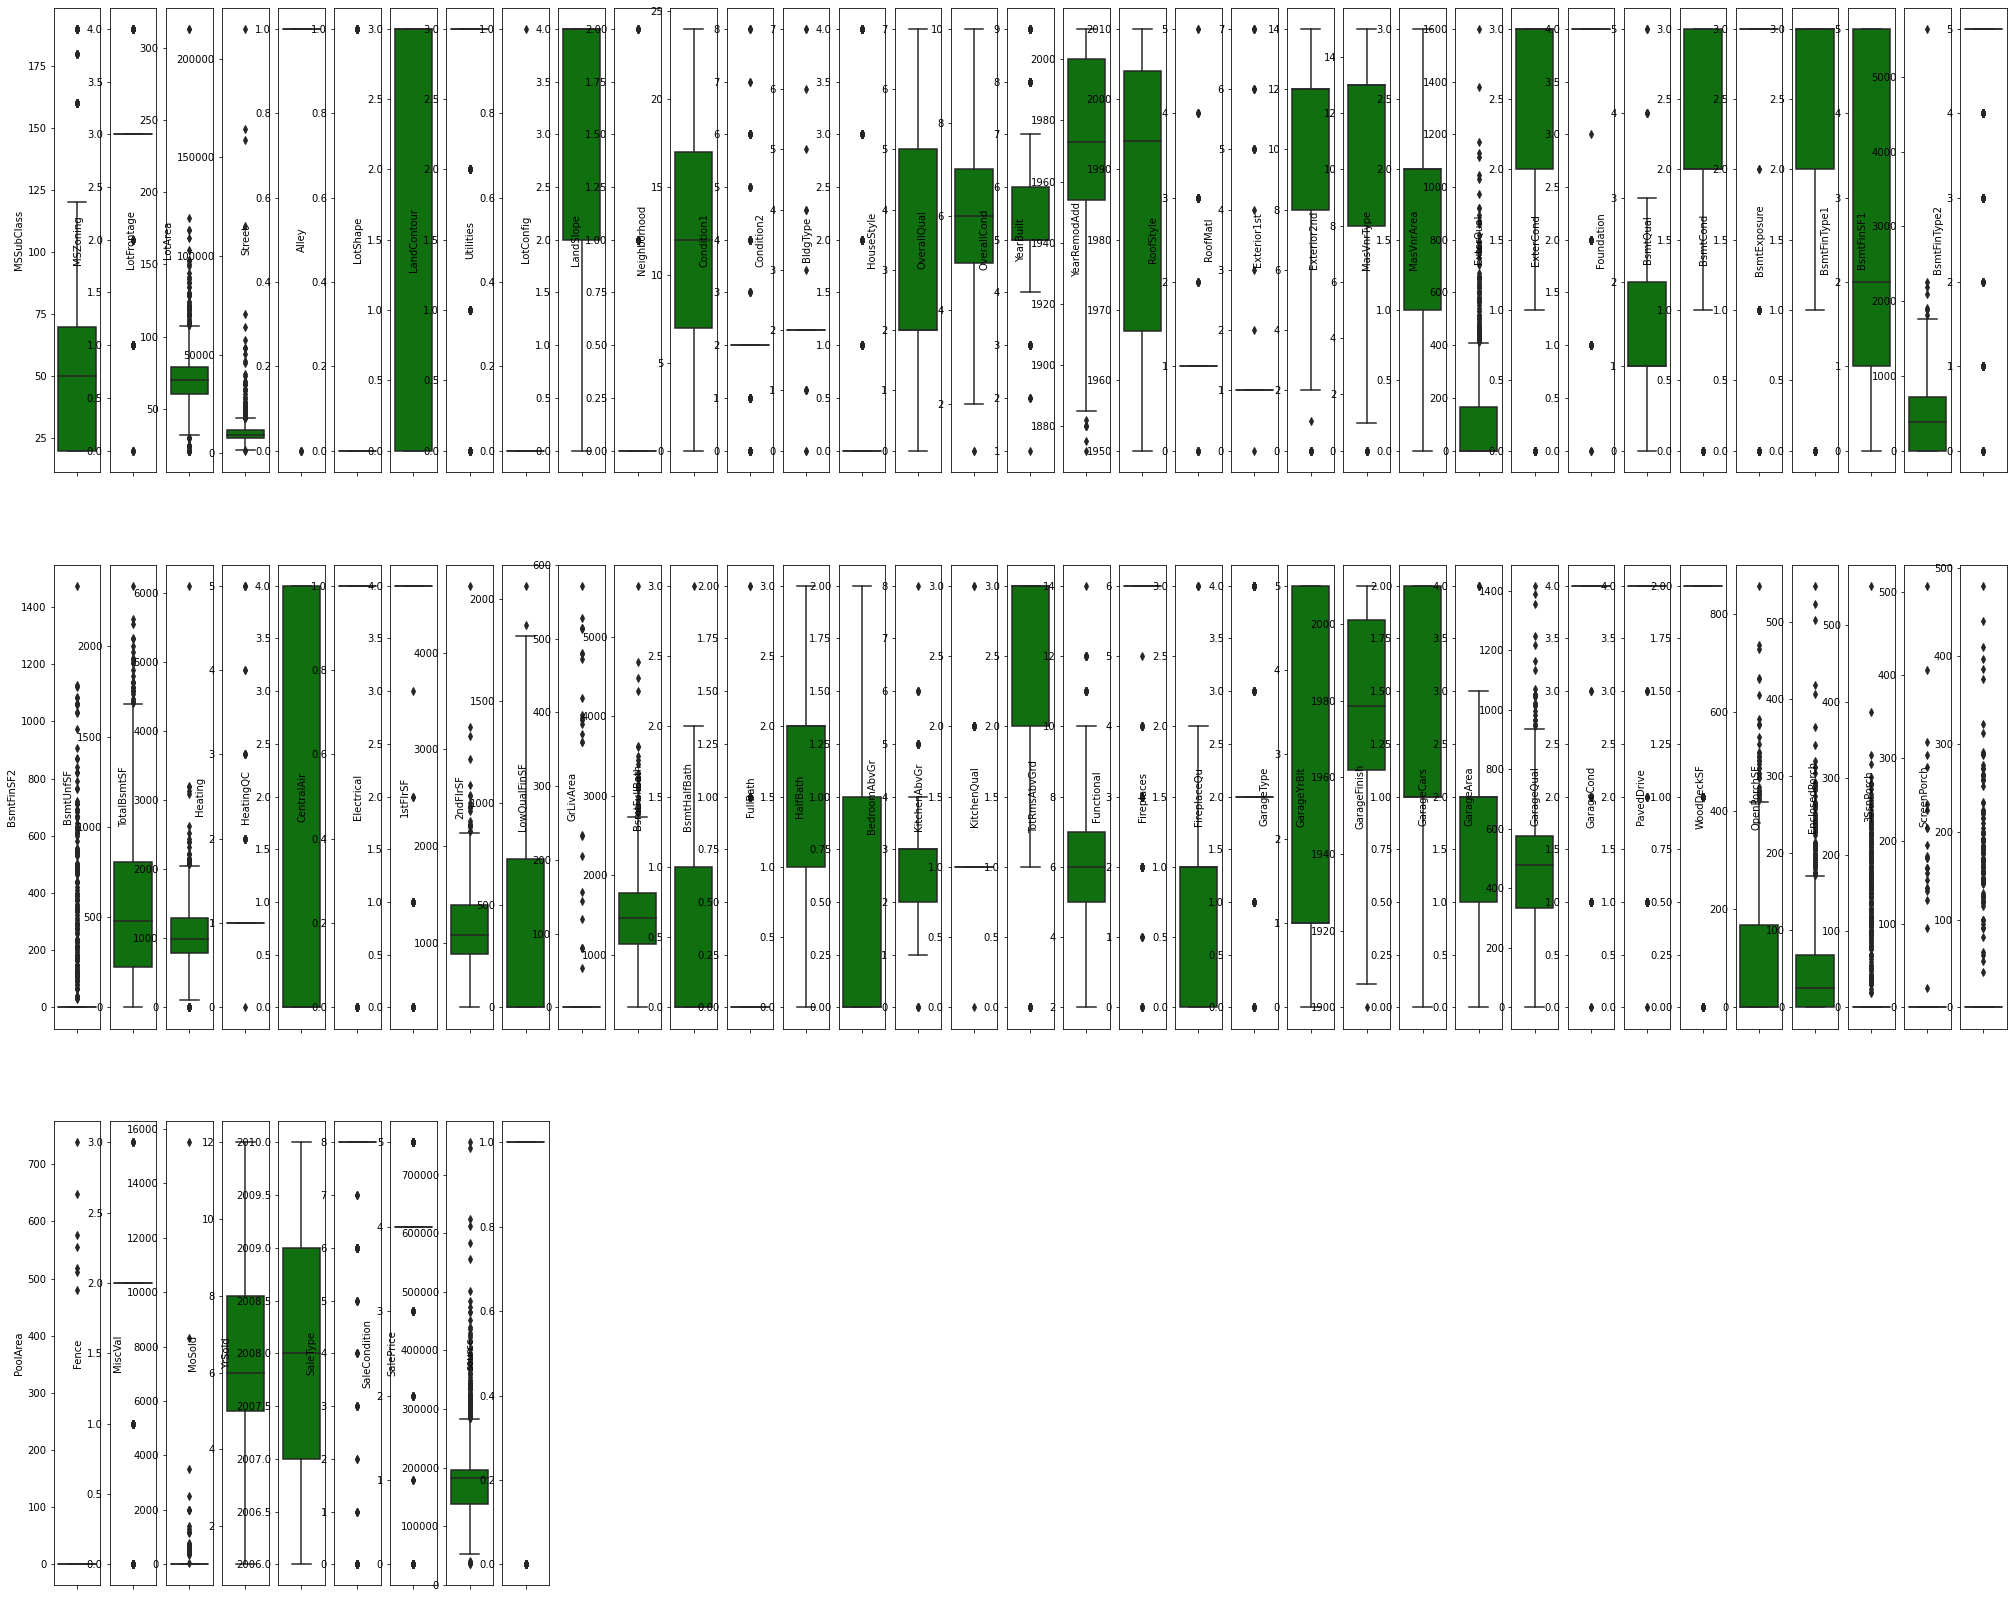

In [24]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

From this visualization method,we can see that there are alot of of outliers in this dataset.

# UNIVARIATE ANALYSIS

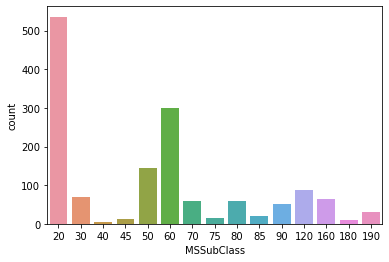

In [25]:
sns.countplot(d1["MSSubClass"])

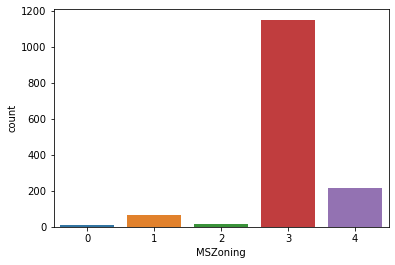

In [26]:
sns.countplot(d1["MSZoning"])

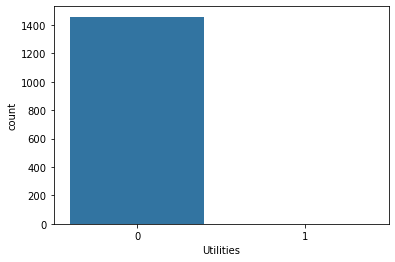

In [27]:
sns.countplot(d1["Utilities"])

all public utilities are available in all houses

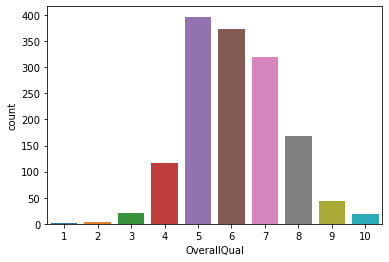

In [28]:
sns.countplot(d1["OverallQual"])

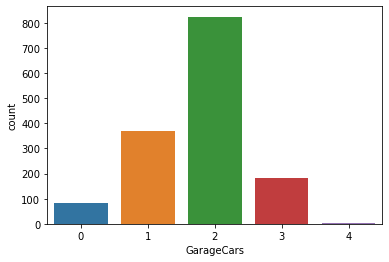

In [29]:
sns.countplot(d1["GarageCars"])

most of the houses have an average car capacity garage

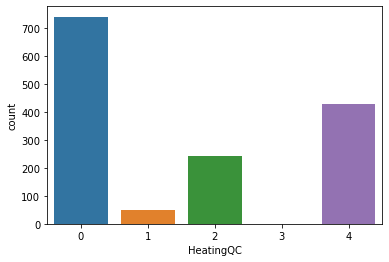

In [30]:
sns.countplot(d1["HeatingQC"])

0-excelent
1-fair
2- good
3-poor
4-average

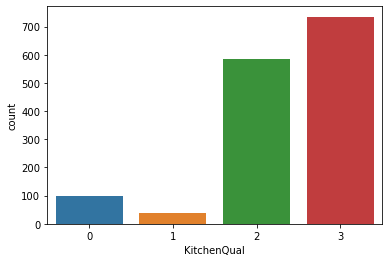

In [31]:
sns.countplot(d1["KitchenQual"])

0-excelent
1-fair
2-good
3-average

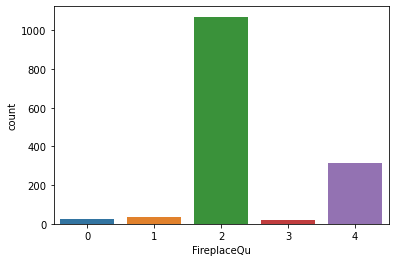

In [32]:
sns.countplot(d1["FireplaceQu"])

fireplace quality is average for maximum number of houses

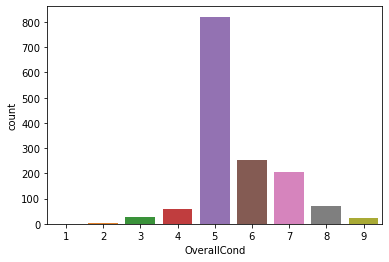

In [33]:
sns.countplot(d1["OverallCond"])

10-Very Excellent
9-Excellent
8-Very Good
7-Good
6-Above Average
5-Average
4Below Average
3-Fair
2-Poor
1-Very Poor

# BIVARIATE ANALYSIS

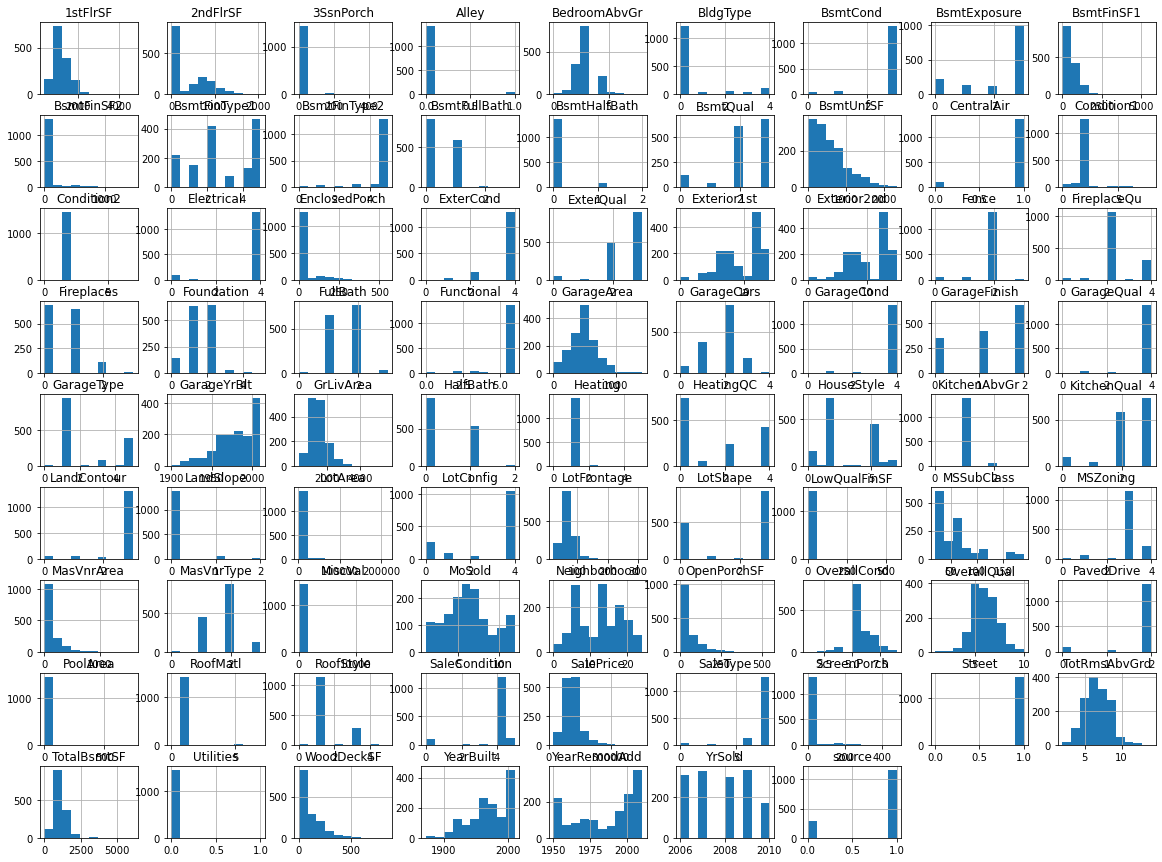

In [34]:
d1.hist(figsize=(20,15))
plt.show()

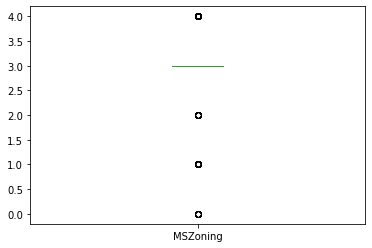

In [35]:
#Box plot is the best method to check the presence of outliers
d1["MSZoning"].plot.box()

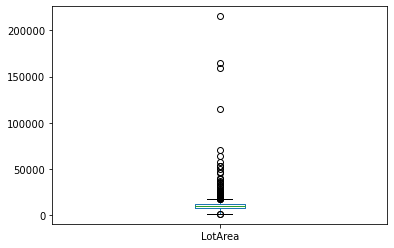

In [36]:
d1["LotArea"].plot.box()

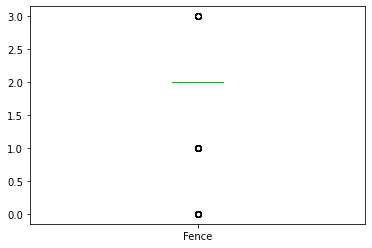

In [37]:
d1["Fence"].plot.box()

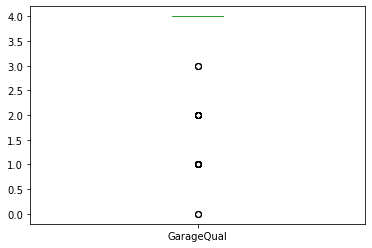

In [38]:
d1["GarageQual"].plot.box()

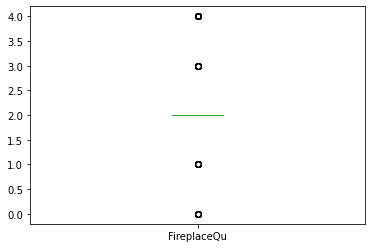

In [39]:
d1["FireplaceQu"].plot.box()

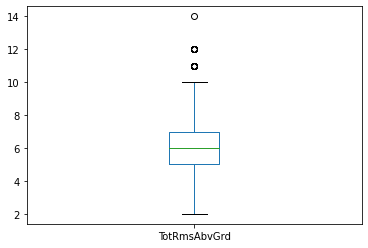

In [40]:
d1["TotRmsAbvGrd"].plot.box()

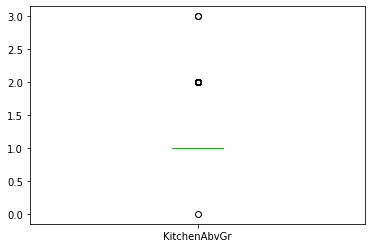

In [41]:
d1["KitchenAbvGr"].plot.box()

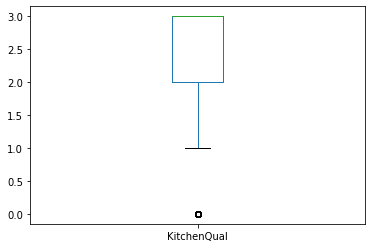

In [42]:
d1["KitchenQual"].plot.box()

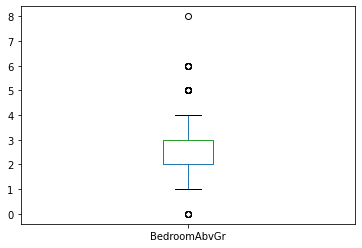

In [43]:
d1["BedroomAbvGr"].plot.box()

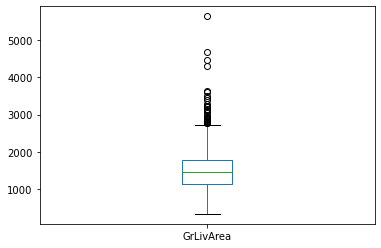

In [44]:
d1["GrLivArea"].plot.box()

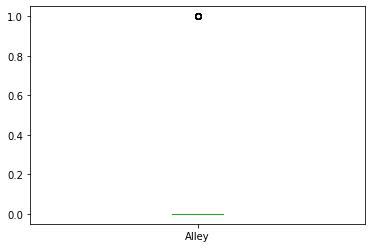

In [45]:
d1["Alley"].plot.box()

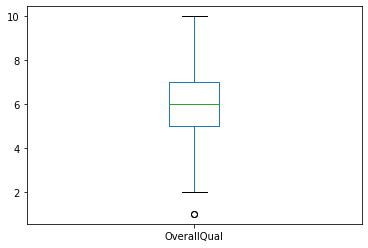

In [46]:
d1["OverallQual"].plot.box()

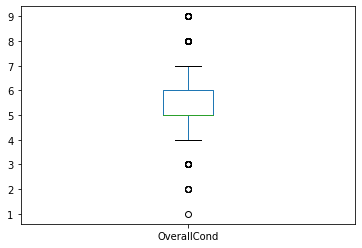

In [47]:
d1["OverallCond"].plot.box()

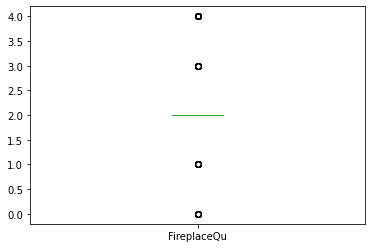

In [48]:
d1["FireplaceQu"].plot.box()


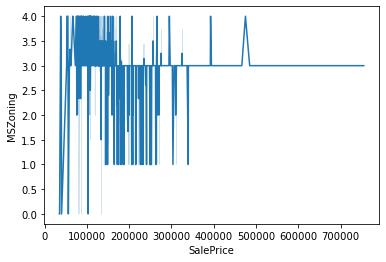

In [49]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='MSZoning',data=d1)

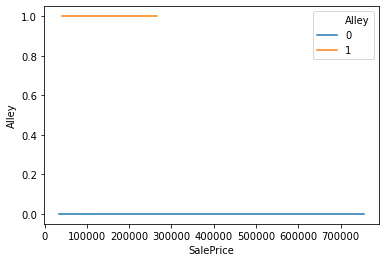

In [50]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='Alley',hue='Alley',data=d1)

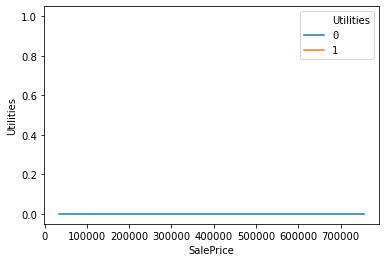

In [51]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='Utilities',hue='Utilities',data=d1)

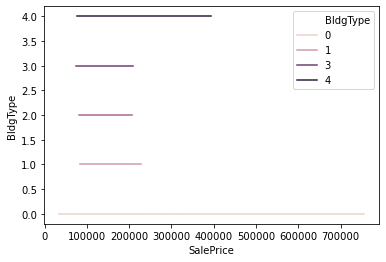

In [52]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='BldgType',hue='BldgType',data=d1)

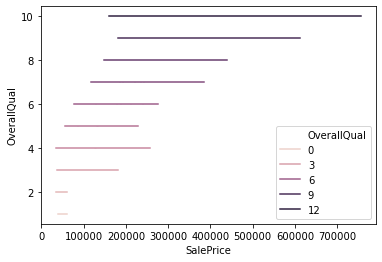

In [53]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='OverallQual',hue='OverallQual',data=d1)

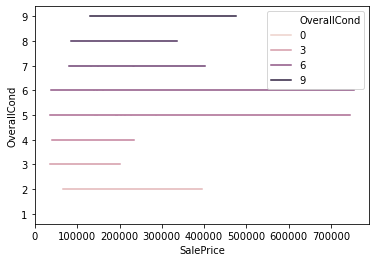

In [54]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='OverallCond',hue='OverallCond',data=d1)

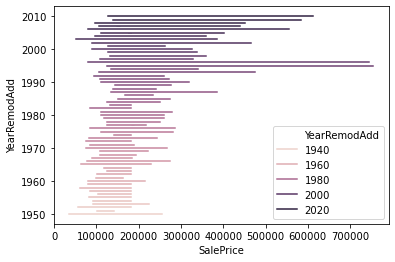

In [55]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='YearRemodAdd',hue='YearRemodAdd',data=d1)

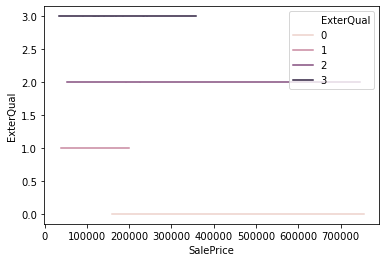

In [56]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='ExterQual',hue='ExterQual',data=d1)

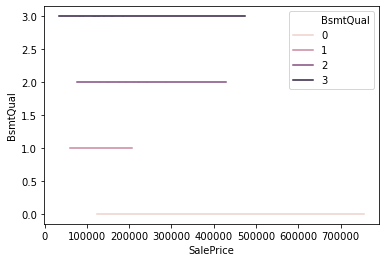

In [57]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='BsmtQual',hue='BsmtQual',data=d1)

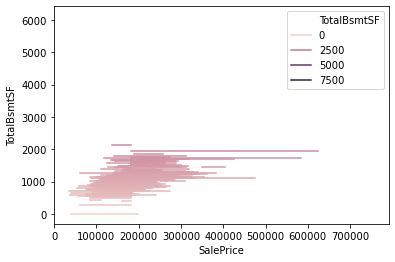

In [58]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='TotalBsmtSF',hue='TotalBsmtSF',data=d1)

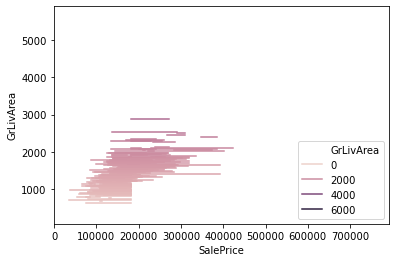

In [59]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='GrLivArea',hue='GrLivArea',data=d1)

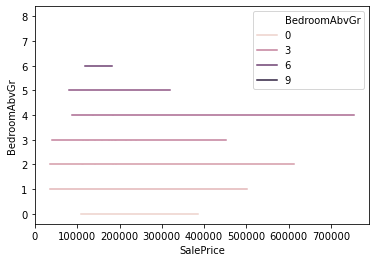

In [60]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='BedroomAbvGr',hue='BedroomAbvGr',data=d1)

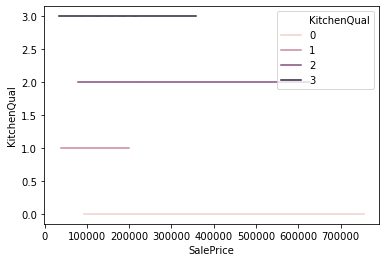

In [61]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='KitchenQual',hue='KitchenQual',data=d1)

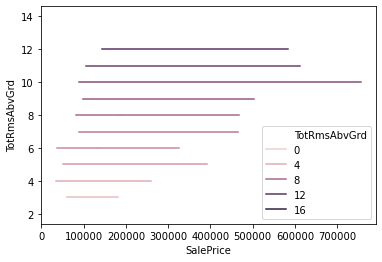

In [62]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='TotRmsAbvGrd',hue='TotRmsAbvGrd',data=d1)

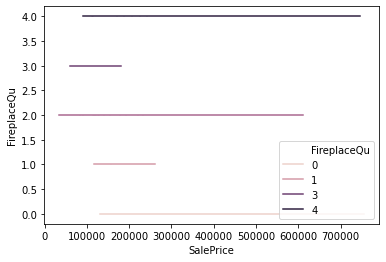

In [63]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='FireplaceQu',hue='FireplaceQu',data=d1)

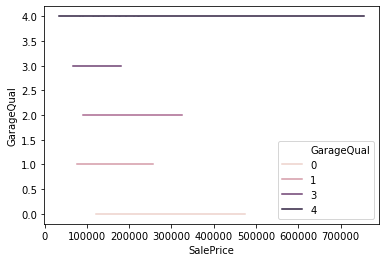

In [64]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='GarageQual',hue='GarageQual',data=d1)

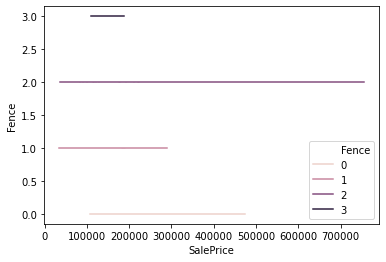

In [65]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='SalePrice', y='Fence',hue='Fence',data=d1)

In [66]:
d1.isnull().values.any()

False

In [67]:
df=d1.drop("SalePrice",axis=1)
df.shape

(1460, 78)

In [68]:
df.isnull().values.any()

False

In [69]:
df.skew()

MSSubClass        1.407657
MSZoning         -1.735395
LotFrontage       2.384950
LotArea          12.207688
Street          -15.518770
                   ...    
MoSold            0.212053
YrSold            0.096269
SaleType         -3.868638
SaleCondition    -2.741167
source           -1.501543
Length: 78, dtype: float64

In [70]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
df=pd.DataFrame(power_transform(df,method='yeo-johnson'),columns=df.columns)
df.skew()

MSSubClass        0.069019
MSZoning          0.223233
LotFrontage       0.173047
LotArea           0.026569
Street          -15.518770
                   ...    
MoSold           -0.039399
YrSold            0.093295
SaleType         -2.202788
SaleCondition    -0.337921
source           -1.501543
Length: 78, dtype: float64

In [71]:
from scipy.stats import zscore
columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>3 or df[columns[i]][j]<-3:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
            df[columns[i]]=np.cbrt((df[columns[i]]))

In [72]:
x=df[columns]
y=d1[["SalePrice"]]

In [73]:
print(x.shape)
print(y.shape)

(1460, 77)
(1460, 1)


In [74]:
df.isnull().values.any()

False

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.36324345, -0.18559478,  0.43713294, ..., -0.61373929,
         0.38898086,  0.03228058],
       [-1.16426915, -0.18559478,  1.17741947, ..., -0.61373929,
         0.38898086,  0.03228058],
       [ 0.49345981, -0.18559478,  1.1318119 , ..., -0.61373929,
         0.38898086,  0.03228058],
       ...,
       [-1.16426915, -0.18559478,  0.43713294, ...,  1.64331205,
         0.38898086,  0.03228058],
       [ 0.24264746,  1.99587338, -1.29336699, ..., -1.36889844,
         0.38898086,  0.03228058],
       [ 1.68747585,  1.99587338, -1.85209224, ..., -1.36889844,
         0.38898086,  0.03228058]])

# PCA

In [76]:
from sklearn.decomposition import PCA
c=40
pca=PCA(n_components=c)
X=pca.fit_transform(x)
X.shape

(1460, 40)

pca is done to remove multicollinearity.Multicollinearity means the feature columns of a dataset shows high correlation with each other.This may affect our model prediction accuracy and also the result.So PCA is done to resolve this problem

In [77]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [99]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 51 is 0.6816511294508754


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=51)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 77)
(292, 77)
(1168, 1)
(292, 1)


# MODEL PREDICTION

In [102]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn .linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [103]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of LinearRegression() is: 0.6283177167738989
Error:
Mean absolute error: 25096.657883162883
Mean squared error: 1190535171.6352272
Root mean squared error: 34504.13267472792
r2_score: 0.6816511294508754
******************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 32773.30858861888
Mean squared error: 2209878232.9118724
Root mean squared error: 47009.34197488699
r2_score: 0.40907899551400917
******************************************************************************


score of KNeighborsRegressor() is: 0.7040858663287761
Error:
Mean absolute error: 26269.10327746763
Mean squared error: 1325959739.1640892
Root mean squared error: 36413.73009132804
r2_score: 0.645438626750765
******************************************************************************


score of SVR() is: 0.0007015294677962247
Error:
Mean absolute error: 43581.181410501515
Mean squared error: 3739559690.48934
Root mean squa

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=51)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 23934.34667770981
mean squared error: 1092735443.016389
root mean squared error: 33056.54916981488
0.7078027576325563


In [109]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 27918.63258228365
mean squared error: 1342264546.7411458
root mean squared error: 36636.9287296458
0.6410787244141147


In [110]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[ 7.99435657e-01  8.16475134e-01  6.24076707e-01  8.79110640e-01
  7.69673639e-01  8.19204991e-01  8.08497127e-01  7.81697900e-01
 -4.47565295e+30 -4.58497260e+30]
-9.060625551843195e+29 1.8122899753861173e+30


In [111]:
import joblib
joblib.dump(rf,'rf_housing_price.pkl')

['rf_housing_price.pkl']